<a href="https://colab.research.google.com/github/AayushiC/COMPUTATIONAL-STUDY-OF-ELECTRONIC-PROPERTIES-OF-MATERIALS/blob/main/Graphene_Tight_Binding_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from math import sqrt

In [2]:
L = int(input("Total length of chain in one direction: "))
N = int(input("Number of unit cell in a chain in one direction: "))
e = float(input("On-site parameter: "))
t = float(input("Hopping parameter: "))

Total length of chain in one direction: 30
Number of unit cell in a chain in one direction: 60
On-site parameter: 0.5
Hopping parameter: 1.0


In [3]:
# Constructing the Hamiltonian

POS = np.zeros((N,N,2),int)
Nlist = np.zeros((2*N*N,3),int)

count = 0
for i in range(N):
  for j in range(N):
    POS[i,j,0] = count
    POS[i,j,1] = count+1
    count+=2

count = 0
for i in range(N):
  for j in range(N):

    Nlist[count,0] = POS[i,j,1]
    Nlist[count,1] = POS[(i + N -1)%N,j,1]
    Nlist[count,2] = POS[i,(j + N -1)%N,1]

    Nlist[count+1,0] = POS[i,j,0]
    Nlist[count+1,1] = POS[(i + N +1)%N,j,0]
    Nlist[count+1,2] = POS[i,(j + N +1)%N,0]

    count+=2

H = np.zeros((2*N*N,2*N*N))
for i in range(2*N*N):
  for j in range(2*N*N):
    if i == j:
       H[i,j] = e
    if j in Nlist[i]:
      H[i,j] = t

In [4]:
# Determining Eigen Values and Eigen Vectors from the Hamiltonian Matrix

E,W = np.linalg.eig(H)

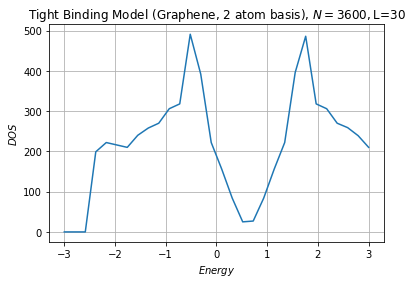

In [5]:
# Plotting Density of States vs Energy

_E = np.real(np.sort(E))
ene = np.linspace(-3.0*t,3.0*t,L)
DOS = np.zeros(L)
de = 6.0*t/L
for i in range(L):
  eh = -3.0*t + i*de + de/2.0
  el = -3.0*t + i*de - de/2.0
  s = 0
  for j in range(2*N*N):
    if _E[j] >= el and _E[j] <=eh:
      s += 1
  DOS[i] = s

fig, ax = plt.subplots()
ax.set_title('Tight Binding Model (Graphene, 2 atom basis), $N='+str(N*N)+', $L='+str(L))
ax.set_ylabel('$DOS$')
ax.set_xlabel('$Energy$')
ax.plot(ene,DOS)
ax.grid(True)

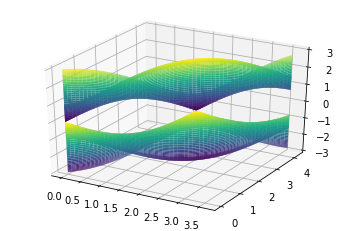

In [6]:
# Plotting Energy vs k 

def Energy(kx,ky,t):
  return t*np.sqrt(1+4*np.cos(3*kx/2)*np.cos(sqrt(3)*ky/2)+4*np.cos(sqrt(3)*ky/2)*np.cos(sqrt(3)*ky/2))

kx = np.linspace(0,2*np.pi/sqrt(3),N)
ky = np.linspace(0,4*np.pi/3,N)
ka,kb = np.meshgrid(kx,ky)
ene = Energy(ka,kb,t)

ax = plt.axes(projection='3d')
ax.plot_surface(kx, ky, ene, rstride=1, cstride=1,cmap='viridis', edgecolor='none')
ax.plot_surface(kx, ky, -1*ene, rstride=1, cstride=1,cmap='viridis', edgecolor='none')